In [67]:
import tensorflow as tf
import os.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [122]:
data_dir = r"C:\Users\Vinnie\Documents\Alzheimers"

In [123]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [124]:
os.listdir(r"C:\Users\Vinnie\Documents\Alzheimers")

['Dementia', 'NonDemented']

In [125]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [126]:
#Remove Dodgy Images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:\Users\Vinnie\Documents\Alzheimers\Dementia\MildDemented
Issue with image C:\Users\Vinnie\Documents\Alzheimers\Dementia\ModerateDemented
Issue with image C:\Users\Vinnie\Documents\Alzheimers\Dementia\VeryMildDemented


In [128]:
Data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Vinnie\Documents\Alzheimers")

Found 5121 files belonging to 2 classes.


In [129]:
Data_iterator = Data.as_numpy_iterator()

In [130]:
batch = Data_iterator.next()

In [131]:
len(batch)

2

In [132]:
batch[0].shape

(32, 256, 256, 3)

In [133]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

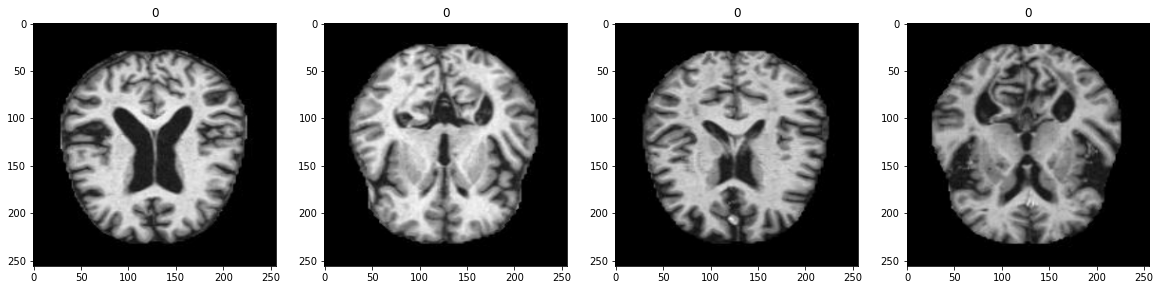

In [134]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [135]:
scaled = batch[0] / 255

In [136]:
scaled.max()

0.9995979

In [137]:
Data = Data.map(lambda x,y: (x/255, y))

In [138]:
scaled_iterator = Data.as_numpy_iterator()

In [139]:
batch = scaled_iterator.next()

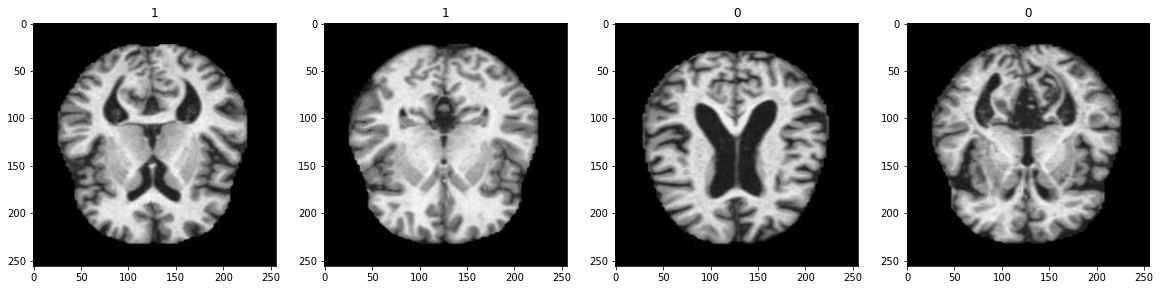

In [140]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [141]:
len(Data)

161

In [142]:
train_size = int(len(Data)*.7)
val_size = int(len(Data)*.2)
test_size = int(len(Data)*.1)

In [143]:
train_size

112

In [144]:
val_size

32

In [145]:
test_size

16

In [146]:
train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [147]:
model = Sequential()

In [148]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [149]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [151]:
logdir='logs'

In [152]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [153]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
112/112 [==============================] - 71s 629ms/step - loss: 0.6465 - accuracy: 0.6395 - val_loss: 0.5731 - val_accuracy: 0.7197
Epoch 2/20
112/112 [==============================] - 69s 614ms/step - loss: 0.4768 - accuracy: 0.7748 - val_loss: 0.4713 - val_accuracy: 0.7568
Epoch 3/20
112/112 [==============================] - 70s 621ms/step - loss: 0.3392 - accuracy: 0.8513 - val_loss: 0.4021 - val_accuracy: 0.8213
Epoch 4/20
112/112 [==============================] - 69s 617ms/step - loss: 0.2501 - accuracy: 0.8945 - val_loss: 0.3239 - val_accuracy: 0.8457
Epoch 5/20
112/112 [==============================] - 68s 606ms/step - loss: 0.1480 - accuracy: 0.9414 - val_loss: 0.2007 - val_accuracy: 0.9219
Epoch 6/20
112/112 [==============================] - 69s 616ms/step - loss: 0.1017 - accuracy: 0.9618 - val_loss: 0.2422 - val_accuracy: 0.9023
Epoch 7/20
112/112 [==============================] - 69s 611ms/step - loss: 0.0651 - accuracy: 0.9760 - val_loss: 0.1493 - val_ac

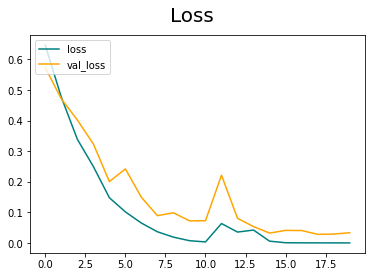

In [154]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

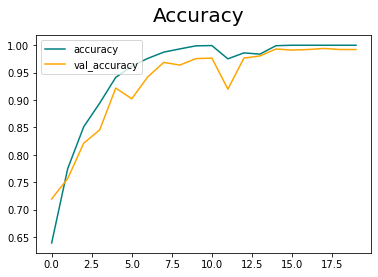

In [155]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [156]:
hist1 = model.fit(test, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 17s 934ms/step - loss: 0.1400 - accuracy: 0.9551 - val_loss: 0.1832 - val_accuracy: 0.9316
Epoch 2/20
16/16 [==============================] - 18s 985ms/step - loss: 0.1530 - accuracy: 0.9355 - val_loss: 0.0865 - val_accuracy: 0.9648
Epoch 3/20
16/16 [==============================] - 18s 948ms/step - loss: 0.0247 - accuracy: 0.9941 - val_loss: 0.0565 - val_accuracy: 0.9785
Epoch 4/20
16/16 [==============================] - 17s 936ms/step - loss: 0.0210 - accuracy: 0.9980 - val_loss: 0.1125 - val_accuracy: 0.9590
Epoch 5/20
16/16 [==============================] - 17s 931ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0418 - val_accuracy: 0.9844
Epoch 6/20
16/16 [==============================] - 17s 938ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.1266 - val_accuracy: 0.9580
Epoch 7/20
16/16 [==============================] - 17s 946ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.0569 - val_accuracy: 0.9805

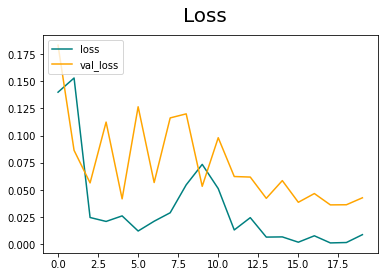

In [157]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

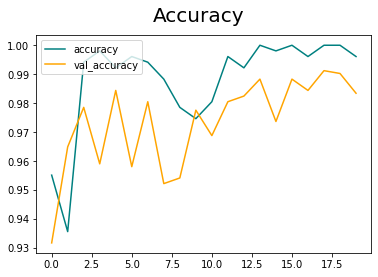

In [158]:

fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [159]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [160]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [161]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 104ms/step


In [162]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [163]:
len(test)

16

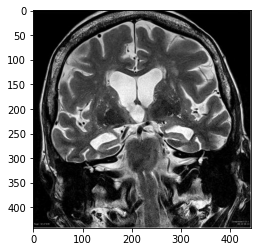

In [164]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\Alzheimers\Alzheimers_TEST.jpg")
plt.imshow(img)
plt.show()

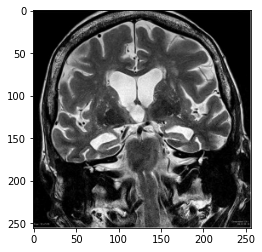

In [165]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [166]:
Alzheimers_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 67ms/step


In [168]:
if Alzheimers_Test > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Alzheimers')

Predicted class is Alzheimers


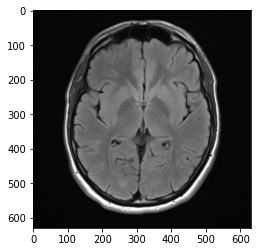

In [169]:
img = cv2.imread(r"C:\Users\Vinnie\Documents\Alzheimers\NORMALBRAINTEST.jpeg")
plt.imshow(img)
plt.show()

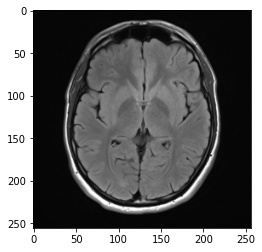

In [170]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [171]:
Normal_Test = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [172]:
if Normal_Test > 0.5: 
    print(f'Predicted class is Brain cancer')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal
